## scikit-learn中的逻辑回归

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(666)
X = np.random.normal(0, 1, size=(200, 2))
y = np.array((X[:, 0] ** 2 + X[:, 1]) < 1.5, dtype = "int")

#噪音，强制20个点为1
for _ in range(20):
    y[np.random.randint(200)] = 1

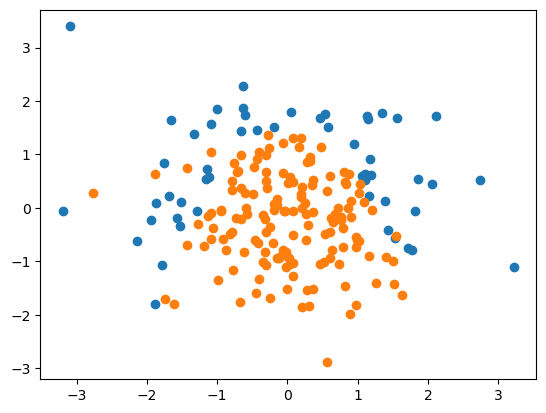

In [3]:
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 666)

## 使用scikit-learn中的逻辑回归

In [6]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [7]:
log_reg.score(X_train, y_train)

0.7933333333333333

In [8]:
log_reg.score(X_test, y_test)

0.86

In [9]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

/var/folders/cl/44g87ngd3s509pxyt354qplw0000gn/T/ipykernel_15256/2833637709.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


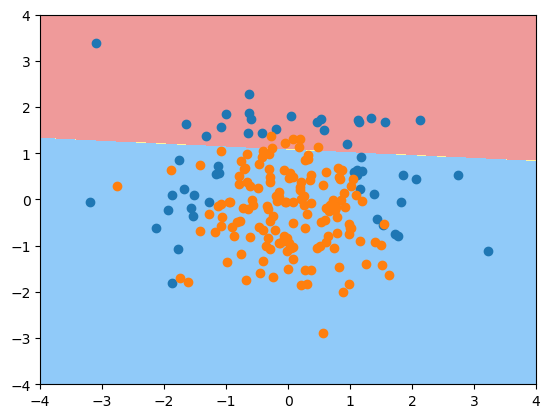

In [10]:
plot_decision_boundary(log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def PolynomialLogisticRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression())
    ])

In [12]:
 from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def PolynomialLogisticRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression())
    ])

In [13]:
poly_log_reg = PolynomialLogisticRegression(degree=2)
poly_log_reg.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('std_scaler', StandardScaler()),
                ('log_reg', LogisticRegression())])

In [14]:
poly_log_reg.score(X_train, y_train)

0.9066666666666666

In [15]:
poly_log_reg.score(X_test, y_test)

0.94

/var/folders/cl/44g87ngd3s509pxyt354qplw0000gn/T/ipykernel_15256/2833637709.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


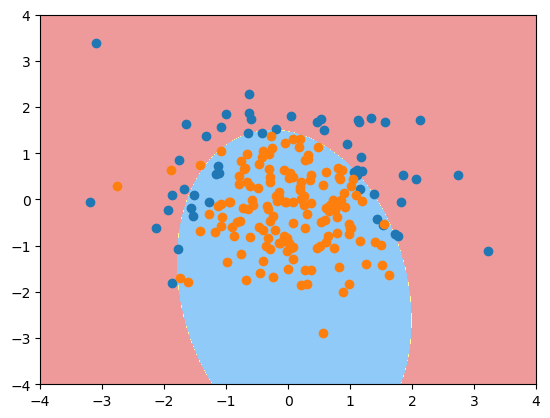

In [16]:
plot_decision_boundary(poly_log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])

In [17]:
poly_log_reg2 = PolynomialLogisticRegression(degree=20)
poly_log_reg2.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=20)),
                ('std_scaler', StandardScaler()),
                ('log_reg', LogisticRegression())])

In [18]:
poly_log_reg2.score(X_train, y_train)

0.94

In [19]:
poly_log_reg2.score(X_test, y_test) #过拟合

0.92

/var/folders/cl/44g87ngd3s509pxyt354qplw0000gn/T/ipykernel_15256/2833637709.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


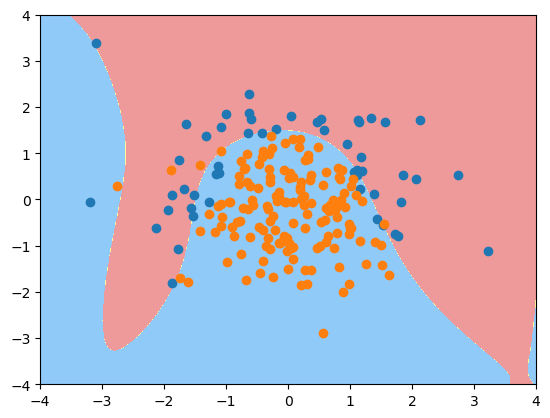

In [20]:
plot_decision_boundary(poly_log_reg2, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])

In [21]:
def PolynomialLogisticRegression(degree, C):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression(C=C))
    ])

poly_log_reg3 = PolynomialLogisticRegression(degree=20, C=0.1)
poly_log_reg3.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=20)),
                ('std_scaler', StandardScaler()),
                ('log_reg', LogisticRegression(C=0.1))])

In [22]:
poly_log_reg3.score(X_train, y_train)

0.84

In [23]:
poly_log_reg3.score(X_test, y_test)

0.92

/var/folders/cl/44g87ngd3s509pxyt354qplw0000gn/T/ipykernel_15256/2833637709.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


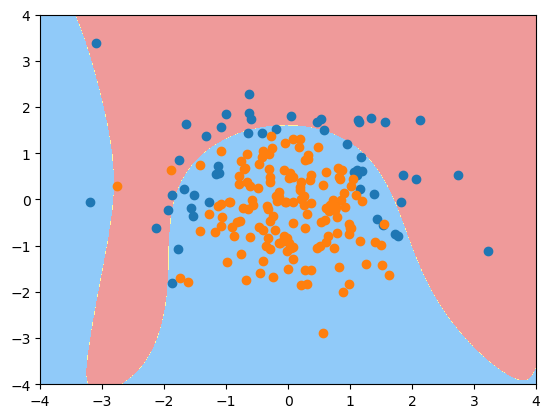

In [24]:
plot_decision_boundary(poly_log_reg3, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])

In [26]:
#尝试修改正则范式，具体请看机器学习中的正则化
'''
最新版的 sklearn 中，默认的 solver 参数是 lbfgs，当 solver 是 lbfgs 时，penalty 不能是 l1。



solver 的参数选择有 5 个：‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’

当 sovler 是 newton-cg’, ‘lbfgs', ‘sag’时，penalty 都不能是 l1。（即只有 liblinear 和 saga 支持 l1）。

所以以下solver修改为saga
'''

def PolynomialLogisticRegression(degree, C, penalty='l2'):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression(C=C, penalty=penalty, solver="saga"))
    ])

poly_log_reg4 = PolynomialLogisticRegression(degree=20, C=0.1, penalty='l1')
poly_log_reg4.fit(X_train, y_train)

/Users/lanluo/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('poly', PolynomialFeatures(degree=20)),
                ('std_scaler', StandardScaler()),
                ('log_reg',
                 LogisticRegression(C=0.1, penalty='l1', solver='saga'))])

In [27]:
poly_log_reg4.score(X_train, y_train)

0.82

In [28]:
poly_log_reg4.score(X_test, y_test)

0.88

/var/folders/cl/44g87ngd3s509pxyt354qplw0000gn/T/ipykernel_15256/2833637709.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


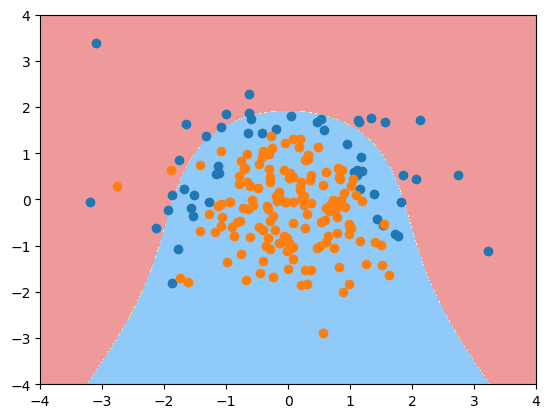

In [29]:
plot_decision_boundary(poly_log_reg4, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])